In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
bank_data = pd.read_csv('bank_loan.csv' ,index_col='Loan_ID')
bank_data

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Loan_ID,,,,,,,,,,,,
LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y


In [ ]:
bank_data.shape

(614, 12)

In [ ]:
bank_data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [ ]:
bank_data['Dependents'].replace('3+', 3,inplace=True)

In [ ]:
bank_data.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [ ]:
bank_data.Gender = bank_data.Gender.fillna(bank_data.Gender.mode()[0])
bank_data.Married = bank_data.Married.fillna(bank_data.Married.mode()[0])
bank_data.Self_Employed = bank_data.Self_Employed.fillna(bank_data.Self_Employed.mode()[0])


In [ ]:
bank_data.LoanAmount = bank_data.LoanAmount.fillna(bank_data.LoanAmount.median())
bank_data.Loan_Amount_Term = bank_data.Loan_Amount_Term.fillna(bank_data.Loan_Amount_Term.median())
bank_data.Credit_History = bank_data.Credit_History.fillna(bank_data.Credit_History.median())
bank_data.Dependents = bank_data.Dependents.fillna(bank_data.Dependents.median())

In [ ]:

bank_data.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in bank_data[['Gender','Married','Education','Self_Employed','Property_Area','Loan_Status']]:
      bank_data[i] = le.fit_transform(bank_data[i])

bank_data.head(10)


,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Loan_ID,,,,,,,,,,,,
LP001002,1,0,0,0,0,5849,0.0,128.0,360.0,1.0,2,1
LP001003,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
LP001005,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
LP001006,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
LP001008,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1
LP001011,1,1,2,0,1,5417,4196.0,267.0,360.0,1.0,2,1
LP001013,1,1,0,1,0,2333,1516.0,95.0,360.0,1.0,2,1
LP001014,1,1,3,0,0,3036,2504.0,158.0,360.0,0.0,1,0
LP001018,1,1,2,0,0,4006,1526.0,168.0,360.0,1.0,2,1


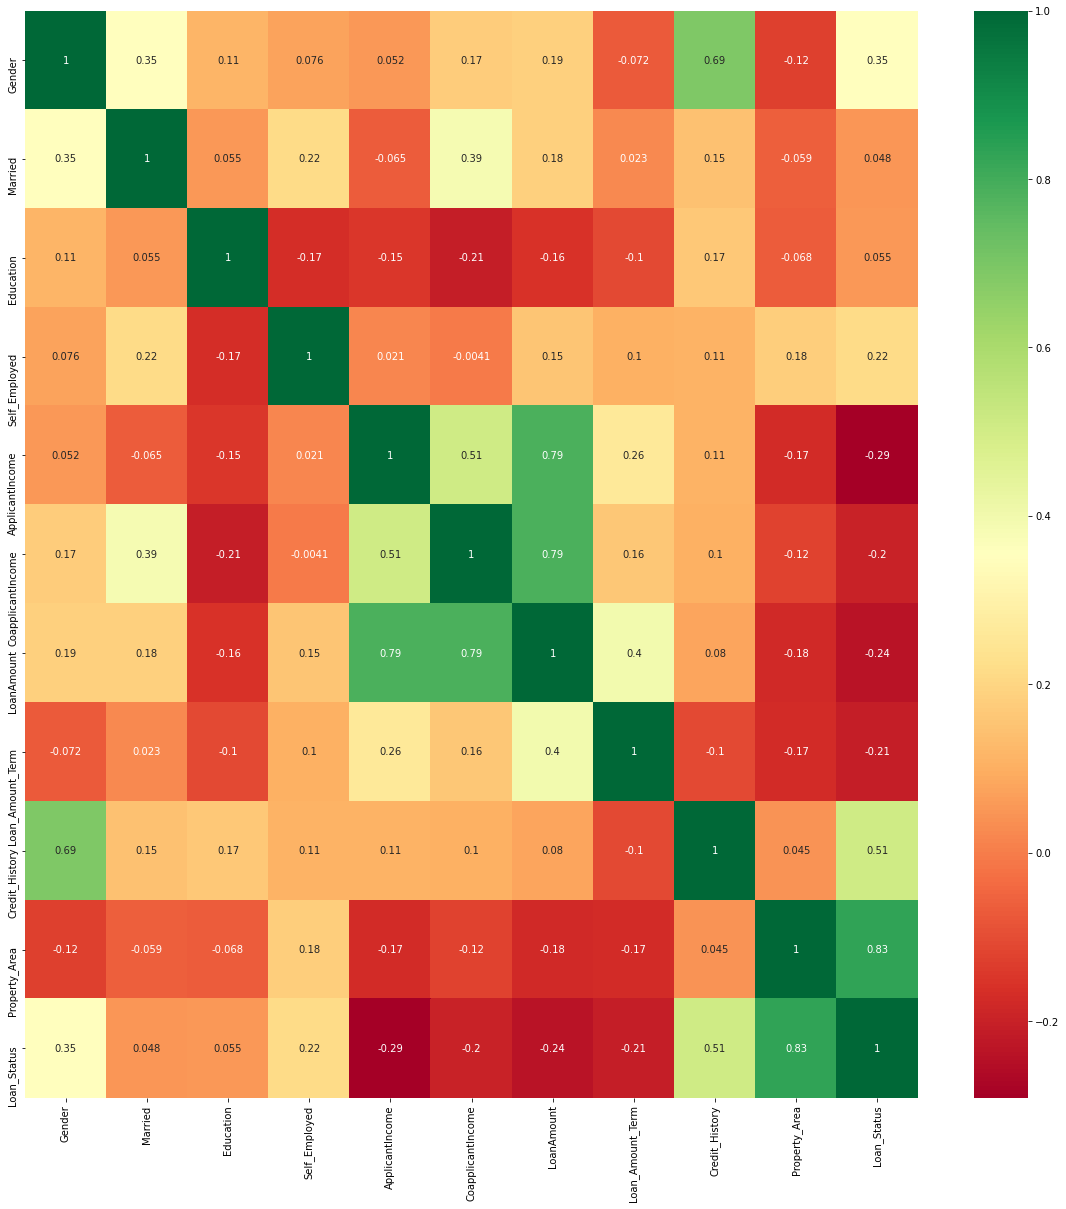

In [ ]:
plt.figure(figsize=(20,20))
sns.heatmap(bank_data.head(20).corr(),annot=True,cmap='RdYlGn')

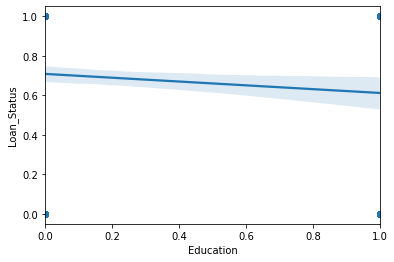

In [ ]:
sns.regplot(bank_data.Education,bank_data.Loan_Status)

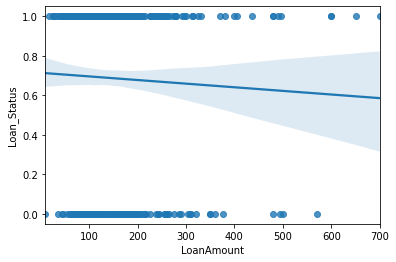

In [ ]:
sns.regplot(bank_data.LoanAmount,bank_data.Loan_Status)

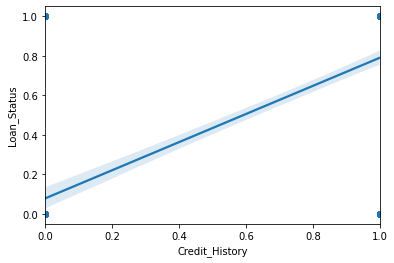

In [ ]:
sns.regplot(bank_data.Credit_History,bank_data.Loan_Status)

In [ ]:
bank_data.groupby('Loan_Status').size()

Loan_Status
0    192
1    422
dtype: int64

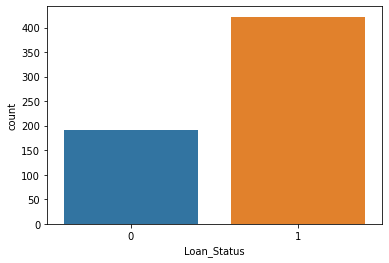

In [ ]:
sns.countplot(bank_data.Loan_Status,data=bank_data)

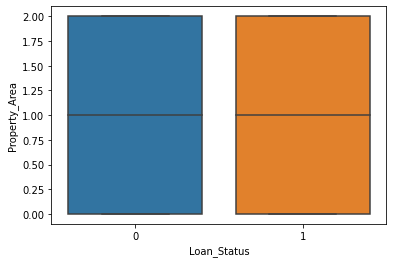

In [ ]:
sns.boxplot(x='Loan_Status',y='Property_Area', data=bank_data)

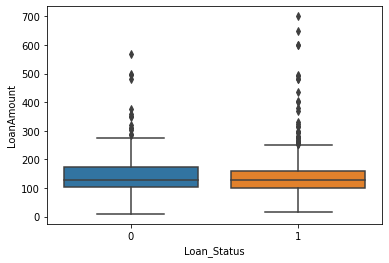

In [ ]:
sns.boxplot(x='Loan_Status',y='LoanAmount', data=bank_data)

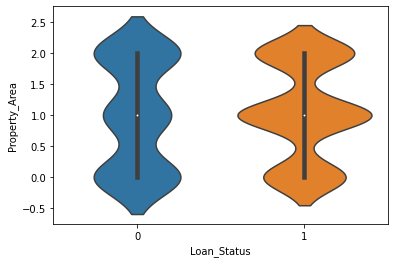

In [ ]:
sns.violinplot(x="Loan_Status", y="Property_Area", data=bank_data, size=8)


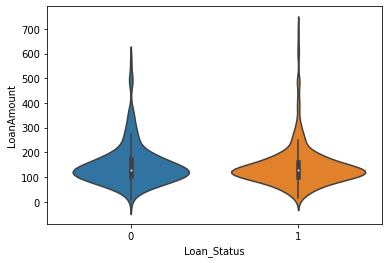

In [ ]:
sns.violinplot(x="Loan_Status", y="LoanAmount", data=bank_data, size=8)

In [ ]:
loan_granted = bank_data.loc[bank_data["Loan_Status"] == 1]
loan_not_granted = bank_data.loc[bank_data["Loan_Status"] == 0]


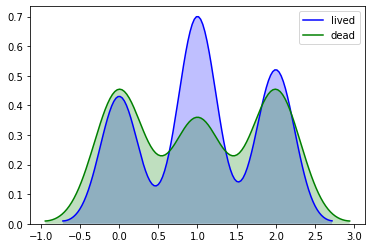

In [ ]:
sns.kdeplot(loan_granted["Property_Area"],color='b',shade=True,label='lived')
sns.kdeplot(loan_not_granted["Property_Area"],color='g',shade=True,label='dead')


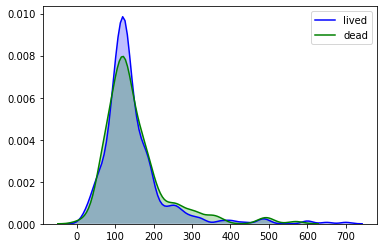

In [ ]:
sns.kdeplot(loan_granted["LoanAmount"],color='b',shade=True,label='lived')
sns.kdeplot(loan_not_granted["LoanAmount"],color='g',shade=True,label='dead')


In [ ]:
#to remove outliers
bank_data['LoanAmount'] = np.log(bank_data['LoanAmount'])
bank_data['LoanAmount'] = np.log(bank_data['LoanAmount'])

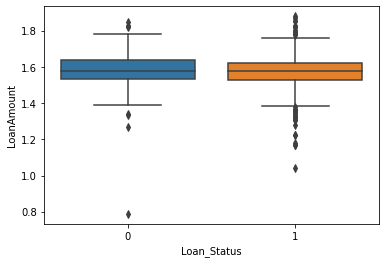

In [ ]:
sns.boxplot(x='Loan_Status',y='LoanAmount', data=bank_data)

In [ ]:
#Feature selection
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [ ]:
X = bank_data.drop('Loan_Status',axis=1)
y = bank_data['Loan_Status']

In [ ]:
bestfeatures = SelectKBest(score_func=chi2, k=8)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  
print(featureScores.nlargest(8,'Score'))

                Specs         Score
6   CoapplicantIncome  11342.041603
5     ApplicantIncome     93.904964
9      Credit_History     26.005877
8    Loan_Amount_Term      3.778554
3           Education      3.540502
1             Married      1.782425
10      Property_Area      0.377837
2          Dependents      0.085953


In [ ]:
#X.columns

In [ ]:
X = X.drop(['Gender','Self_Employed','LoanAmount'],axis=1)

X.head()

,Married,Dependents,Education,ApplicantIncome,CoapplicantIncome,Loan_Amount_Term,Credit_History,Property_Area
Loan_ID,,,,,,,,
LP001002,0,0,0,5849,0.0,360.0,1.0,2
LP001003,1,1,0,4583,1508.0,360.0,1.0,0
LP001005,1,0,0,3000,0.0,360.0,1.0,2
LP001006,1,0,1,2583,2358.0,360.0,1.0,2
LP001008,0,0,0,6000,0.0,360.0,1.0,2


In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

Logistic Regression


In [ ]:
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression()
lr_result = lr_model.fit(X_train,y_train)

In [ ]:
lr_predictions = lr_result.predict(X_test)
lr_predictions

array([1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1])

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(lr_predictions,y_test)

0.8373983739837398

In [ ]:
from sklearn.metrics import confusion_matrix
cm= confusion_matrix(y_test,lr_predictions)
con_df = pd.DataFrame(cm, index=['Actualneg','Actualpos'],columns=['Predictedneg','Predictedpos'])
con_df


,Predictedneg,Predictedpos
Actualneg,15,18
Actualpos,2,88


In [ ]:
from sklearn import metrics
print('\n**Classification Report:\n',metrics.classification_report(y_test,lr_predictions))


**Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.45      0.60        33
           1       0.83      0.98      0.90        90

    accuracy                           0.84       123
   macro avg       0.86      0.72      0.75       123
weighted avg       0.84      0.84      0.82       123



Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier()
dt_result = dt_model.fit(X_train,y_train)

In [ ]:
dt_pred = dt_result.predict(X_test)
dt_pred

array([0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0])

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(dt_pred,y_test)

0.6341463414634146

In [ ]:
from sklearn.metrics import confusion_matrix
cm= confusion_matrix(y_test,dt_pred)
con_df = pd.DataFrame(cm, index=['Actualneg','Actualpos'],columns=['Predictedneg','Predictedpos'])
con_df

,Predictedneg,Predictedpos
Actualneg,20,13
Actualpos,32,58


In [ ]:
from sklearn import metrics
print('\n**Classification Report:\n',metrics.classification_report(y_test,dt_pred))


**Classification Report:
               precision    recall  f1-score   support

           0       0.38      0.61      0.47        33
           1       0.82      0.64      0.72        90

    accuracy                           0.63       123
   macro avg       0.60      0.63      0.60       123
weighted avg       0.70      0.63      0.65       123



Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=50,criterion='entropy',random_state=0)
rf_result = rf_model.fit(X_train,y_train)


In [ ]:
rf_pred = rf_result.predict(X_test)
rf_pred

array([0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1,
       1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1])

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(rf_pred,y_test)

0.7804878048780488

In [ ]:
from sklearn.metrics import confusion_matrix
cm= confusion_matrix(y_test,rf_pred)
con_df = pd.DataFrame(cm, index=['Actualneg','Actualpos'],columns=['Predictedneg','Predictedpos'])
con_df

,Predictedneg,Predictedpos
Actualneg,18,15
Actualpos,12,78


In [ ]:
from sklearn import metrics
print('\n**Classification Report:\n',metrics.classification_report(y_test,rf_pred))


**Classification Report:
               precision    recall  f1-score   support

           0       0.60      0.55      0.57        33
           1       0.84      0.87      0.85        90

    accuracy                           0.78       123
   macro avg       0.72      0.71      0.71       123
weighted avg       0.77      0.78      0.78       123



KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier(n_neighbors=7)
knn_result = knn_model.fit(X_train,y_train)

In [ ]:
knn_pred = knn_result.predict(X_test)
knn_pred

array([1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1])

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(knn_pred,y_test)

0.8211382113821138

In [ ]:
from sklearn.metrics import confusion_matrix
cm= confusion_matrix(y_test,knn_pred)
con_df = pd.DataFrame(cm, index=['Actualneg','Actualpos'],columns=['Predictedneg','Predictedpos'])
con_df

,Predictedneg,Predictedpos
Actualneg,16,17
Actualpos,5,85


In [ ]:
from sklearn import metrics
print('\n**Classification Report:\n',metrics.classification_report(y_test,knn_pred))


**Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.45      0.59        33
           1       0.83      0.97      0.89        90

    accuracy                           0.83       123
   macro avg       0.83      0.71      0.74       123
weighted avg       0.83      0.83      0.81       123



SVM

In [ ]:
from sklearn.svm import SVC
svm_model = SVC(kernel='rbf',random_state=0)
svm_result = svm_model.fit(X_train,y_train)

In [ ]:
svm_pred = svm_result.predict(X_test)
svm_pred

array([1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1])

In [ ]:
from sklearn import metrics
metrics.accuracy_score(svm_pred,y_test)

0.8292682926829268

In [ ]:
from sklearn.metrics import confusion_matrix
cm= confusion_matrix(y_test,svm_pred)
con_df = pd.DataFrame(cm, index=['Actualneg','Actualpos'],columns=['Predictedneg','Predictedpos'])
con_df

,Predictedneg,Predictedpos
Actualneg,14,19
Actualpos,2,88


In [ ]:
from sklearn import metrics
print('\n**Classification Report:\n',metrics.classification_report(y_test,svm_pred))


**Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.42      0.57        33
           1       0.82      0.98      0.89        90

    accuracy                           0.83       123
   macro avg       0.85      0.70      0.73       123
weighted avg       0.84      0.83      0.81       123



Logistic Regression is the best method .It gives accuracy of 83.7%




Deploy the Model


In [ ]:
from sklearn.linear_model import LogisticRegression
best_model = LogisticRegression()
best_result = best_model.fit(X,y)

In [ ]:
new_pred = best_result.predict([[1,2,1,3000,2000,120,1.0,2]])
new_pred

array([1])

In [ ]:
new_pred = best_result.predict([[0,2,0,800,700,360,0.0,0]])
new_pred

array([0])